In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
import cv2, os, sys
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from scipy import spatial 
from operator import itemgetter

In [11]:
imgs_path = "sharks"

X_train, y_train, X_test, y_test = [], [], [], []

for dirname in os.listdir(imgs_path):
    dir_name = os.path.join(imgs_path, dirname)
    dir_content = os.listdir(dir_name)
    for filename in dir_content:
        if filename is not None:
            #print(filename)
            img_path = os.path.join(dir_name, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (75,75))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                label = filename.split('_')[0]

                if np.random.rand() < 0.5:
                    X_train.append(img)
                    y_train.append(label)
                else:
                    X_test.append(img)
                    y_test.append(label)

In [12]:
X_train = np.array(X_train)
X_test = np.array(X_test)
print(X_train.shape, X_test.shape)

(755, 75, 75, 3) (791, 75, 75, 3)


In [13]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [14]:
print(X_train.shape)
print(X_test.shape)

(755, 75, 75, 3)
(791, 75, 75, 3)


In [15]:
base_model = tf.keras.applications.InceptionV3(
    weights='imagenet',
    input_shape=(75, 75, 3),
    include_top=False)

87910968/87910968 [==============================] - 6s 0us/step


In [16]:
new_X_test = []
for x in X_test:
    new_X_test.append(cv2.resize(x, (75,75)))
new_X_test = np.array(new_X_test)
new_X_test.shape

(791, 75, 75, 3)

In [17]:
pred = base_model.predict(new_X_test)

25/25 [==============================] - 3s 65ms/step


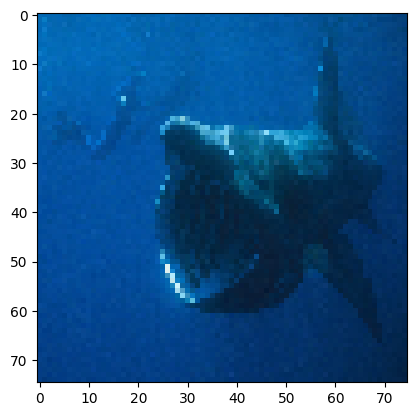

In [18]:
index = 1
plt.imshow(new_X_test[index].reshape(75,75,3))
plt.gray()
plt.show()

In [19]:
img_to_find = pred[index]

In [20]:
def custom_cosine_sim(a,b):
    return np.dot(a, b) / ( nalgnp.linalg.norm(a) * np.li.norm(b))

1
788
259
775
170
787
562
52
769
88


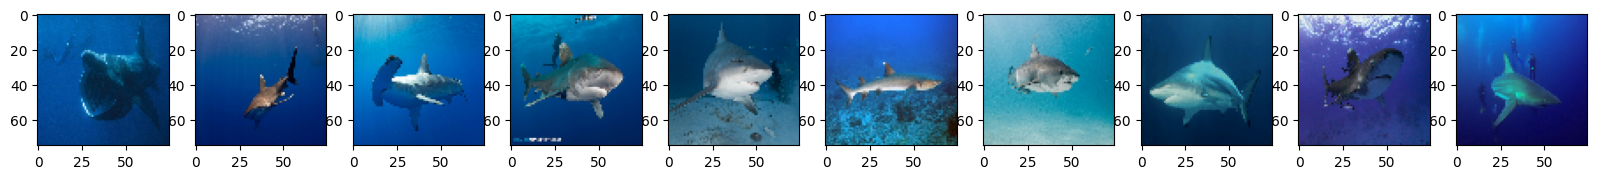

In [21]:
cosine_list = []
for index_image,xt in enumerate(pred):
    result = 1 - spatial.distance.cosine(img_to_find.reshape(-1), xt.reshape(-1))
    cosine_list.append(dict({'res':result, 'i':index_image}))
    
cosine_list.sort(key=itemgetter('res'), reverse=True)

fig, ax = plt.subplots(nrows=1, ncols=10,figsize=(20, 4))
plt.gray()
for indice, row in enumerate(ax):
    print (cosine_list[indice]['i'])
    row.imshow(new_X_test[cosine_list[indice]['i']].reshape(75,75,3))

plt.show()